In [351]:
import pandas as pd
import numpy as np
import seaborn as sns

In [352]:
car_df = pd.read_csv('cars.csv')
brand_df = pd.read_csv('brand.csv')

In [353]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [354]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


- brand 컬럼과 title컬럼으로 병합
    - title컬럼의 값들을 띄어쓰기 구분으로 나눠 인덱스 0값
    - 대문자로 변환

In [355]:
car_df['brand'] = car_df['title'].str.split(expand=True)[0]
# expand=True는 데이터프레임으로 저장

In [356]:
brand_df['title'] = brand_df['title'].str.upper()

In [357]:
car_df = car_df.merge(brand_df, left_on='brand', right_on='title', how='left')
# 서로 컬럼명이 다르기 때문에 left_on, right_on 활용
# left join 해야하므로 how 파라미터 활용

In [358]:
car_df.head()

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,VAUXHALL,United Kingdom


In [359]:
car_df.drop('title_y', axis=1, inplace=True)

In [360]:
car_df.head()

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [361]:
# car_df.rename(columns={'title_x': 'title'}, inplace=True)
car_df = car_df.rename({'title_x': 'title'}, axis=1)

In [362]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [363]:
bonus_df = car_df.copy()

In [364]:
# Engine, Emission Class 를 숫자형 데이터로 타입 변형
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 432.2+ KB


In [365]:
car_df['Engine'] = car_df['Engine'].str.split('L', expand=True)[0]

In [366]:
car_df['Emission Class'] = car_df['Emission Class'].str.split(expand=True)[1]

In [367]:
# 문자+숫자 타입에서 문자를 제거해주어도 자동으로 숫자형 타입으로 변환되지 않
car_df['Engine'] = pd.to_numeric(car_df['Engine'])
car_df['Emission Class'] = pd.to_numeric(car_df['Emission Class'])

In [368]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   float64
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 432.2+ KB


In [369]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3642.000000,3662.000000,3652.000000,3600.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,1.606260,4.321409,4.900329,4.910000
std,4480.629885,3.941718e+04,5.082387,1.546028,0.486584,0.986760,0.577046,0.910688
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


결측치 제거  
Outliers
- miles가 너무 적은 차량
- registration_year가 최신인데 previous owners가 너무 많은 차량

In [370]:
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand                0.000000
country              0.000000
dtype: float64

In [371]:
car_df['Service history'].unique()

array([nan, 'Full'], dtype=object)

In [372]:
car_df.groupby('Service history')['Price'].mean()
# groupby 할 때 null값은 제외된다.

Service history
Full    7290.209259
Name: Price, dtype: float64

In [373]:
car_df['Service history'].fillna('Unknown',inplace=True)

C:\Users\juwonhee\AppData\Local\Temp\ipykernel_10324\3663238870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_df['Service history'].fillna('Unknown',inplace=True)


In [374]:
car_df.groupby('Service history')['Price'].mean()

Service history
Full       7290.209259
Unknown    5529.414045
Name: Price, dtype: float64

In [375]:
car_df[car_df['Engine'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,BMW,Germany
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Unknown,TOYOTA,Japan
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,NISSAN,Japan
1087,AUDI A1,7995,50500,2012,NaN,Petrol,Hatchback,NaN,Automatic,3.0,4.0,NaN,Unknown,AUDI,Germany
1304,MAZDA MAZDA6,1500,155670,2015,1.0,Diesel,Estate,NaN,Manual,NaN,NaN,NaN,Unknown,MAZDA,Japan
1429,FORD FOCUS,1895,109000,2009,NaN,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,Unknown,FORD,United States
1533,CITROEN C1,3900,71000,2015,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,CITROEN,France
1619,FORD KA,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,FORD,United States
2022,AUDI A3,5750,139225,2012,3.0,Diesel,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,AUDI,Germany
2136,TOYOTA PRIUS,8950,66000,2012,NaN,Petrol Hybrid,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,TOYOTA,Japan


In [376]:
car_df['na_values'] = car_df.isna().sum(axis = 1)

In [377]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,na_values
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic,0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom,0
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea,1
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom,0
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom,1


In [378]:
len(car_df[car_df['na_values'] >= 4])
# 결측치가 너무 많이 섞여있는 행은 제거하는 게 낫다고 판단
# 데이터가 많았다면 2개 이상 결측치가 포함된 행은 제거하는 게 나음

13

In [379]:
car_df = car_df[car_df['na_values'] < 4]

In [380]:
car_df.drop('na_values', axis = 1, inplace = True)

In [381]:
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.009526
Gearbox              0.000000
Doors                0.003266
Seats                0.005988
Emission Class       0.020142
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

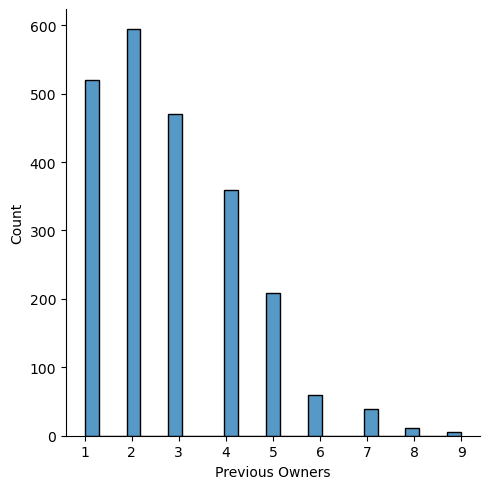

In [382]:
sns.displot(car_df['Previous Owners'])

In [383]:
car_df['Previous Owners'].median()

3.0

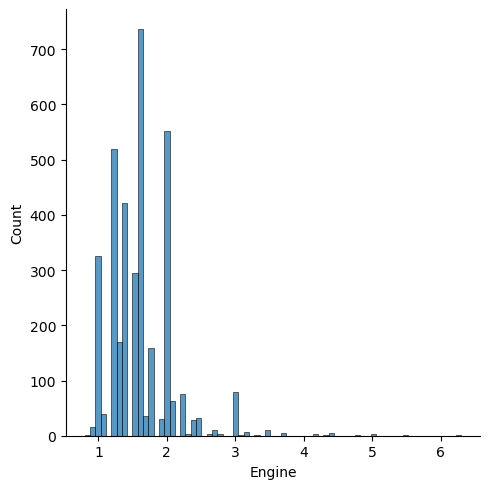

In [384]:
sns.displot(car_df['Engine'])

In [385]:
car_df['Engine'].mean()

1.6061555372355043

In [386]:
car_df['Engine'].median()

1.6

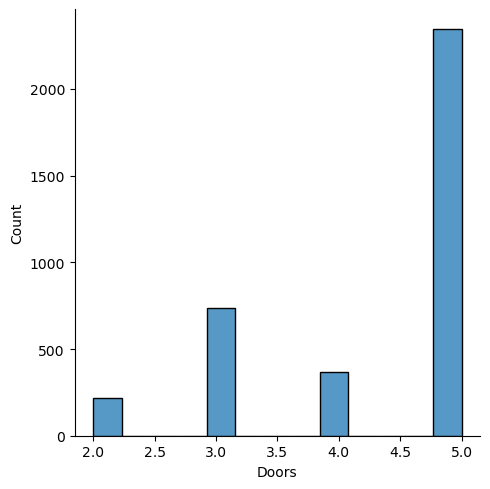

In [387]:
sns.displot(car_df['Doors'])

In [388]:
car_df['Doors'].median()

5.0

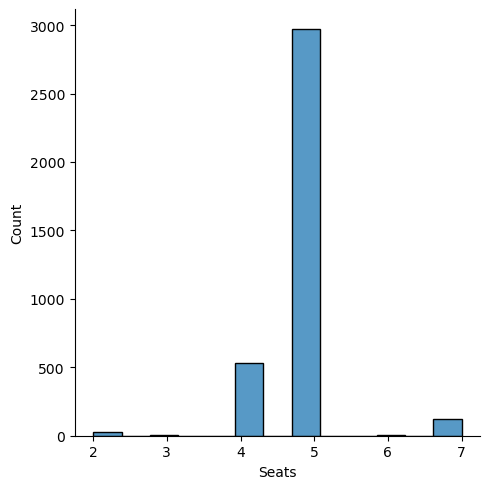

In [389]:
sns.displot(car_df['Seats'])

In [390]:
car_df['Seats'].median()

5.0

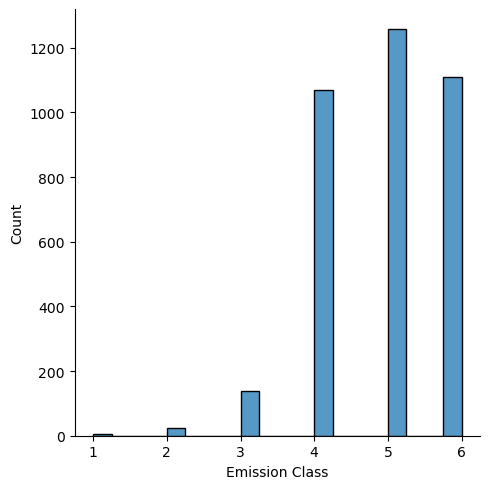

In [391]:
sns.displot(car_df['Emission Class'])

In [392]:
car_df['Emission Class'].median()

5.0

In [393]:
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.009526
Gearbox              0.000000
Doors                0.003266
Seats                0.005988
Emission Class       0.020142
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

In [394]:
car_df.fillna({'Previous Owners':'3.0','Engine':'1.6', 'Doors':'5.0', 'Seats':'5.0', 'Emission Class':'5.0'}, inplace=True)

In [395]:
car_df.isna().mean()

title                0.0
Price                0.0
Mileage(miles)       0.0
Registration_Year    0.0
Previous Owners      0.0
Fuel type            0.0
Body type            0.0
Engine               0.0
Gearbox              0.0
Doors                0.0
Seats                0.0
Emission Class       0.0
Service history      0.0
brand                0.0
country              0.0
dtype: float64

In [396]:
car_df.describe()

,Price,Mileage(miles),Registration_Year
count,3674.000000,3.674000e+03,3674.000000
mean,5788.852477,8.134587e+04,2011.847305
std,4486.599984,3.943769e+04,5.083173
min,400.000000,1.000000e+00,1953.000000
25%,2490.000000,5.698400e+04,2008.000000
50%,4000.000000,8.000000e+04,2012.000000
75%,7995.000000,1.030000e+05,2016.000000
max,33900.000000,1.110100e+06,2025.000000


In [397]:
car_df['Price'].sort_values()
# outliers 없음

3245      400
3278      450
1238      495
3246      499
3429      500
        ...  
3102    25995
3230    25995
3224    28240
2936    30000
3212    33900
Name: Price, Length: 3674, dtype: int64

In [398]:
car_df['Mileage(miles)'].sort_values()
# miles <= 1000 데이터는 이상치로 판단 -> 제거

3219          1
3100          1
2013          6
3102        222
2760       1048
         ...   
1259     274100
1283     274100
2048     274100
1946     274100
1037    1110100
Name: Mileage(miles), Length: 3674, dtype: int64

In [399]:
car_df = car_df[car_df['Mileage(miles)'] > 1000]

In [400]:
car_df['Registration_Year'].sort_values()

3024    1953
237     1972
2375    1981
1239    1985
1353    1987
        ... 
3140    2022
2760    2023
3173    2023
2967    2023
8       2025
Name: Registration_Year, Length: 3670, dtype: int64

In [401]:
car_df = car_df[car_df['Registration_Year'] < 2025]

In [402]:
# car_df['Previous Owners'].sort_values()
# TypeError

In [403]:
car_df['Previous Owners'] = car_df['Previous Owners'].astype(float)

In [404]:
car_df['Previous Owners'].sort_values()

1949    1.0
530     1.0
3134    1.0
3133    1.0
3130    1.0
       ... 
1314    9.0
404     9.0
3463    9.0
212     9.0
3331    9.0
Name: Previous Owners, Length: 3669, dtype: float64

In [405]:
car_df[car_df['Previous Owners'] == 9]
# 이상치로 판단하지 않음

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
212,VAUXHALL CORSA,1500,96270,2008,9.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,VAUXHALL,United Kingdom
404,BMW 3 SERIES,2500,138910,2003,9.0,Petrol,Convertible,2.5,Manual,2.0,4.0,3.0,Unknown,BMW,Germany
1314,MINI HATCH,1875,98710,2007,9.0,Petrol,Hatchback,1.6,Manual,3.0,4.0,4.0,Unknown,MINI,United Kingdom
3331,PEUGEOT 207 SW,895,114312,2008,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France
3463,PEUGEOT 207 SW,1450,115000,2009,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France


In [406]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [407]:
car_df.groupby('brand')['Price'].agg(['mean','std'])
# std 가 null로 나오는 것은 데이터가 한 개뿐이라서.

,mean,std
brand,,
ABARTH,11216.333333,6039.482621
ALFA,3197.388889,2495.694814
AUDI,7719.527397,4866.621560
BMW,8325.981343,6036.639654
CHEVROLET,3331.642857,1306.453191
CHRYSLER,2433.800000,796.043152
CITROEN,4652.873684,3291.745835
DACIA,7439.571429,3647.734338
DAEWOO,995.000000,NaN


In [408]:
car_df.pivot_table(values='Price', index='brand', columns='Fuel type')
# default로 평균이 계산됨

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
brand,,,,,,
ABARTH,NaN,NaN,NaN,11216.333333,NaN,NaN
ALFA,4214.666667,NaN,NaN,2688.750000,NaN,NaN
AUDI,8731.301205,NaN,NaN,6386.555556,NaN,NaN
BMW,7342.022222,23220.0,NaN,7058.486239,NaN,19460.652174
CHEVROLET,5249.500000,NaN,NaN,3012.000000,NaN,NaN
CHRYSLER,NaN,NaN,NaN,2433.800000,NaN,NaN
CITROEN,4026.891892,NaN,NaN,5052.206897,NaN,NaN
DACIA,6754.600000,NaN,NaN,7820.111111,NaN,NaN
DAEWOO,NaN,NaN,NaN,995.000000,NaN,NaN


In [409]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


<Axes: xlabel='Previous Owners', ylabel='Price'>

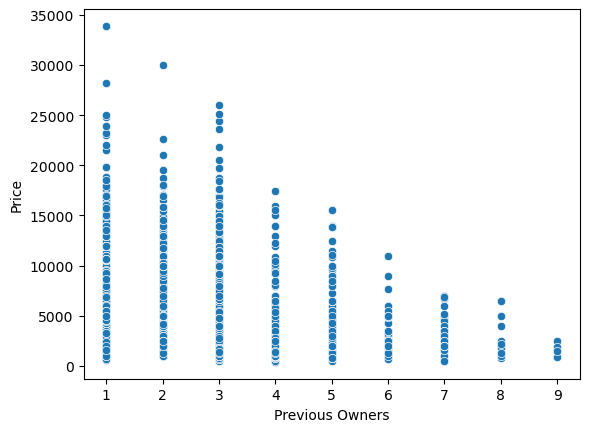

In [410]:
sns.scatterplot( x= car_df['Previous Owners'], y = car_df['Price'])

<Axes: xlabel='Registration_Year', ylabel='Price'>

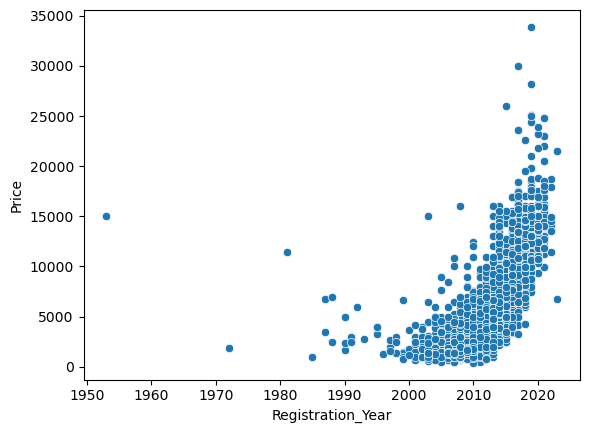

In [411]:
sns.scatterplot( x= car_df['Registration_Year'], y = car_df['Price'])

<Axes: xlabel='Registration_Year', ylabel='Price'>

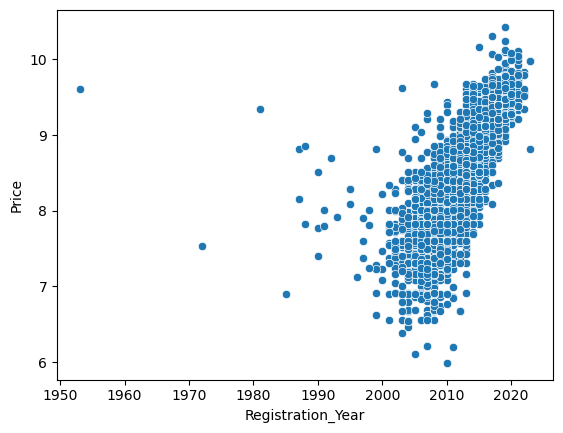

In [412]:
sns.scatterplot( x= car_df['Registration_Year'], y = np.log(car_df['Price']))
# log를 썼다면 exp()를 사용해서 다시 원래대로 돌려놔야 한다.
# 그렇지 않으면 예측값을 파악할 수 없게된다.

In [413]:
car_df[['title','Fuel type','Body type','Gearbox','Emission Class','Service history','brand','country']].nunique()

title              448
Fuel type            6
Body type           10
Gearbox              2
Emission Class       7
Service history      2
brand               48
country             12
dtype: int64

In [414]:
car_df.drop('title', axis = 1, inplace = True)

pandas series는 join()을 지원하지 않는다.  
DataFrame 으로 바꿔주어야 한다.

In [415]:
brand_value_counts = car_df['brand'].value_counts().to_frame(name='brand_value_counts')

In [416]:
brand_mean_price = car_df.groupby('brand')['Price'].mean().to_frame(name='brand_mean_price')

In [417]:
brand_value_counts

,brand_value_counts
brand,
VAUXHALL,549
FORD,409
VOLKSWAGEN,271
BMW,268
PEUGEOT,245
TOYOTA,193
NISSAN,178
RENAULT,175
MERCEDES-BENZ,168


In [418]:
brand_mean_price

,brand_mean_price
brand,
ABARTH,11216.333333
ALFA,3197.388889
AUDI,7719.527397
BMW,8325.981343
CHEVROLET,3331.642857
CHRYSLER,2433.800000
CITROEN,4652.873684
DACIA,7439.571429
DAEWOO,995.000000


In [419]:
brand_value_counts.join(brand_mean_price)
# 브랜드별 차량이 1개뿐인 데이터를 others로 묶어주려고 했으나
# 브랜드별 가격 차이가 커서 묶어주지 않기로 판단.

,brand_value_counts,brand_mean_price
brand,,
VAUXHALL,549,4658.207650
FORD,409,4859.144254
VOLKSWAGEN,271,6513.217712
BMW,268,8325.981343
PEUGEOT,245,5463.955102
TOYOTA,193,5282.544041
NISSAN,178,6529.415730
RENAULT,175,5623.371429
MERCEDES-BENZ,168,7703.041667


**원-핫 인코딩(One-Hot Encoding)**  
범주형(문자형) 데이터를 머신러닝에 쓰기 좋게 숫자로 바꾸는 작업

**drop_first = True**  
원-핫 인코딩 결과에서 첫 번째 범주를 제거하는 옵션  
why? 다중공선성(multicollinearity) 문제를 피하기 위해서

In [420]:
# car_df = pd.get_dummies(car_df)
car_df = pd.get_dummies(car_df, drop_first = True)

In [421]:
car_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1495,88585,2008,4.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,949,137000,2011,3.0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2395,96731,2010,5.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1000,85000,2013,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3683,6990,119000,2012,3.0,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3684,3995,139000,2013,3.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3685,1390,179190,2007,3.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Scaling

In [422]:
from sklearn.preprocessing import RobustScaler

In [423]:
rs = RobustScaler()

In [424]:
# numpy 형태로 바뀌게 된다.
rs.fit_transform(car_df)

array([[ 5.26793824e-01, -2.13208449e-01,  5.71428571e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.55040872e-01,  1.86565542e-01, -5.71428571e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-5.54223433e-01,  1.23869958e+00, -1.42857143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.08265213e-04,  1.28216273e+00,  1.42857143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.74114441e-01,  2.15555459e+00, -7.14285714e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.63306085e-01,  4.69401947e-02,  1.42857143e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [425]:
# pandas 형태로 다시 변환
pd.DataFrame(rs.fit_transform(car_df))

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.526794,-0.213208,0.571429,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.455041,0.186566,-0.571429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.554223,1.238700,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.291553,0.363591,-0.285714,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.544959,0.108658,0.142857,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,-0.473206,-0.082537,-0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3665,0.543143,0.847531,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3666,-0.000908,1.282163,0.142857,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3667,-0.474114,2.155555,-0.714286,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
car_df = pd.DataFrame(rs.fit_transform(car_df), columns=car_df.columns)

전체 데이터의 60프로 이상을 나타낼 수 있는 PCA를 구하라

In [427]:
from sklearn.decomposition import PCA

In [428]:
pca = PCA(5)

In [429]:
pca.fit(car_df)

PCA(n_components=5)

In [430]:
pca.explained_variance_ratio_.sum()

0.5386294959002444

In [431]:
pca = PCA(2)

In [432]:
pca.fit(car_df)

PCA(n_components=2)

In [433]:
pca.explained_variance_ratio_.sum()

0.3517346956695534

In [434]:
for i in range(2, 11):
    pca = PCA(i)
    pca.fit(car_df)
    print(i, round(pca.explained_variance_ratio_.sum(),2))

2 0.35
3 0.44
4 0.49
5 0.54
6 0.58
7 0.61
8 0.64
9 0.67
10 0.69


In [435]:
# 적어도 주성분이 7개는 되어야 데이터의 60프로는 포함될 수 있다.

In [436]:
pca = PCA(7)

In [437]:
pd.DataFrame(pca.fit_transform(car_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.536258,0.605624,-0.021823,0.696106,0.053642,-0.391962,0.135916
1,1.552328,0.170510,-1.152200,-0.549814,0.326031,-0.408542,1.084799
2,0.959433,-0.857422,-0.148528,0.879607,0.755332,-0.010444,-0.120477
3,2.196477,0.963763,-0.781473,-0.895475,0.641577,-0.764966,-0.013573
4,0.430781,-0.234704,-0.486314,0.761258,0.794014,0.651673,0.819445
...,...,...,...,...,...,...,...
3664,1.518260,0.187813,-0.820456,0.454318,-0.897681,0.151106,-0.132054
3665,0.365066,-0.315124,1.462891,-0.659588,0.610825,0.274001,0.281675
3666,0.668912,-0.678375,1.911683,-0.338820,0.837345,0.318873,0.339318
3667,1.475309,-1.600278,0.966239,0.927494,-0.429649,-0.496438,-0.088588


In [438]:
bonus_df.groupby('country')['brand'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: brand, dtype: int64

In [439]:
bonus_df = bonus_df.drop(['title','Fuel type','Body type','Engine','Gearbox','Emission Class', 'Service history','brand','country'],
                        axis=1)

In [440]:
# 상관관계는 절댓값으로 판단
# 문자형을 선제거 후, corr()함수 실행
bonus_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000
